# Import library yang dibutuhkan

In [ ]:
import cv2 # digunakan untuk operasi citra
import numpy as np # digunakan untuk operasi matematika
from sklearn.cluster import AgglomerativeClustering # digunakan untuk algoritma clustering
from sklearn.metrics.pairwise import cosine_similarity # digunakan perhitungan similarity
from google.colab.patches import cv2_imshow # digunakan untuk menampilkan gambar dari citra

# Membaca Citra

In [ ]:
# Membaca citra asli
original_img = cv2.imread('Original 0.jpg')

# Membaca citra palsu
forgery_img = cv2.imread('rotated 0.jpg')

# Menampilkan Citra

Original



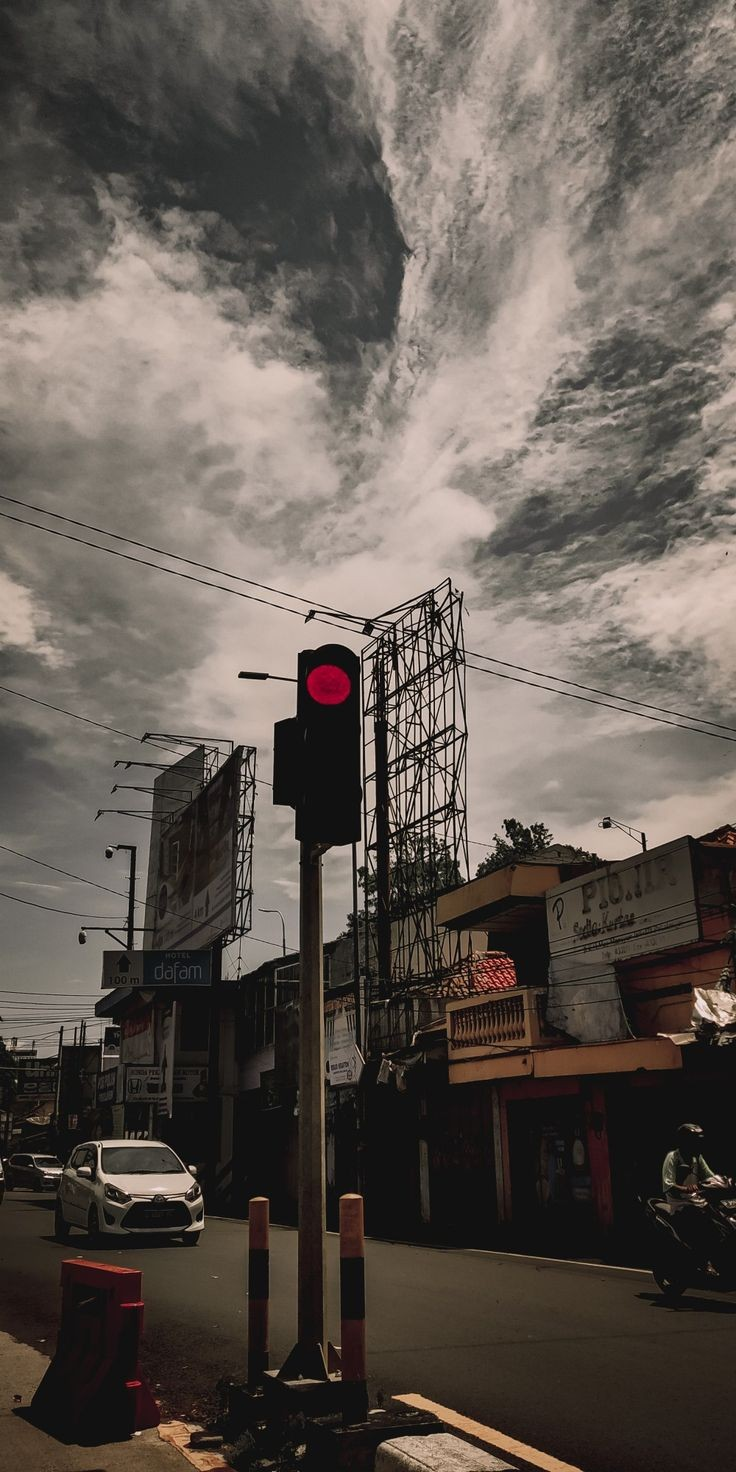

None

 Fake



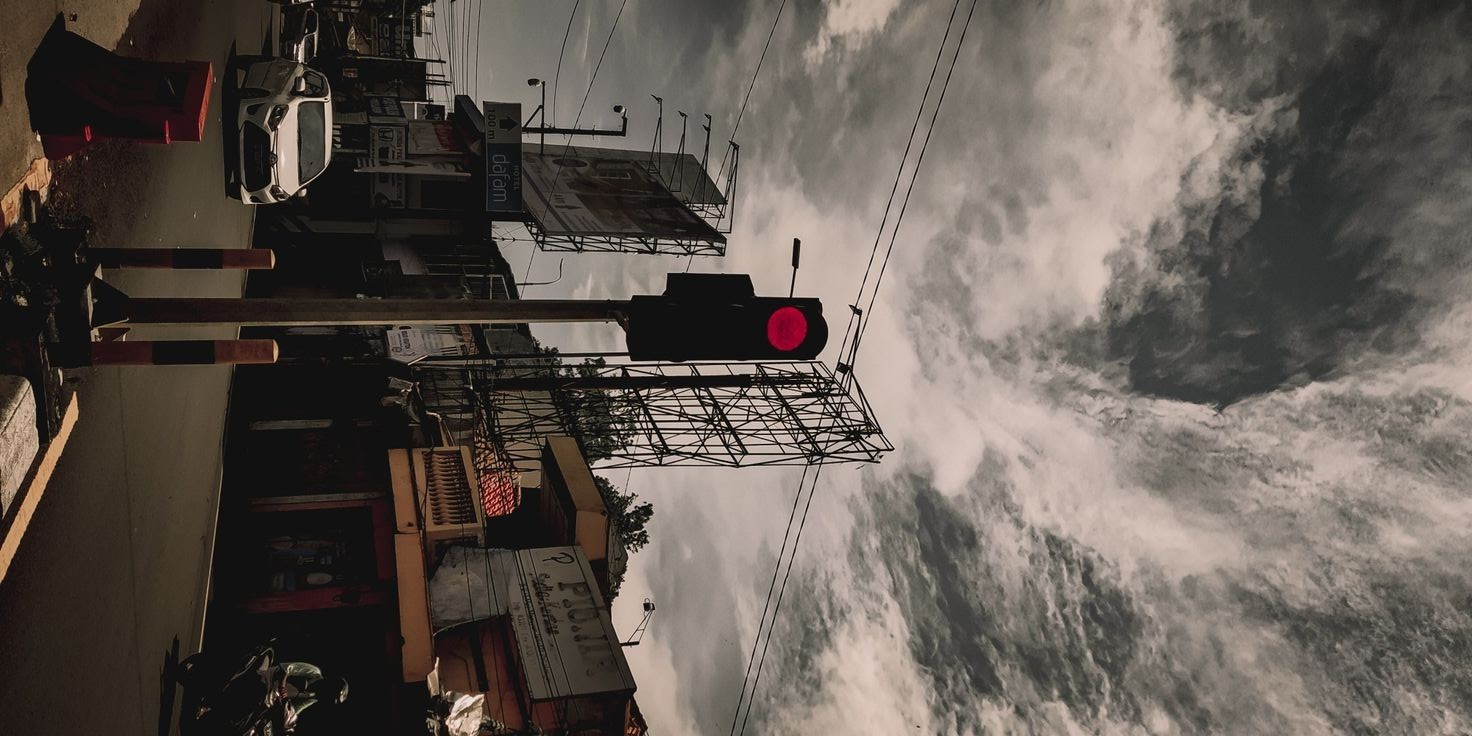

None


In [ ]:
# Menampilkan citra asli
print("Original\n")
print(cv2_imshow(original_img))

# Menampilkan citra palsu
print("\n Fake\n")
print(cv2_imshow(forgery_img))

# Mendeteksi key-points pada citra asli dan citra forgery

In [ ]:
# Mendeteksi key-points pada citra asli
sift = cv2.xfeatures2d.SIFT_create()
original_kp, original_desc = sift.detectAndCompute(original_img, None)

# Mendeteksi key-points pada citra palsu
forgery_kp, forgery_desc = sift.detectAndCompute(forgery_img, None)

# Menggunakan Centroid Linkage Clustering untuk mengelompokkan key-points pada citra asli dan citra forgery

In [ ]:
# Menggunakan Centroid Linkage Clustering untuk mengelompokkan key-points pada citra asli
original_clustering = AgglomerativeClustering().fit(original_desc)
original_clusters = original_clustering.labels_

print(original_clusters ,"\n")

# Menggunakan Centroid Linkage Clustering untuk mengelompokkan key-points pada citra palsu
forgery_clustering = AgglomerativeClustering().fit(forgery_desc)
forgery_clusters = forgery_clustering.labels_

print(forgery_clusters)

[1 1 0 ... 0 0 0] 

[0 1 1 ... 1 0 0]


# Menghitung similarity antara region pada citra asli dan citra forgery

In [ ]:
# Menghitung similarity antara region pada citra asli dan citra palsu
similarity = cosine_similarity(original_desc, forgery_desc)

# Mengambil nilai similarity
similarity = similarity[0][0]

# Membuat kondisi untuk menentukan apakah citra asli dan citra forgery sama atau tidak

In [ ]:
# Membuat threshold similarity
threshold = 0.8

# Membuat kondisi untuk menentukan apakah citra asli dan citra palsu sama atau tidak
if similarity > threshold:
  print("Kedua Citra sama, dengan Similarity", similarity)
else:
  print("Kedua Citra berbeda, dengan Similarity", similarity)

Kedua Citra berbeda, dengan Similarity 0.45549613
